## Final Project Submission

* Student name: Lore Eugene Abing
* Student pace: part time
* Scheduled project review date/time: 13 Aug 2023
* Instructor name: Rajive Islam
* Blog post URL:


# Business Problem

Establishing a new movie production studio, Microsoft faces the formidable challenge of competing against industry giants armed with historical industry insights. To thrive in this competitive landscape, Microsoft needs to strategically determine the types of movies that are most likely to succeed in terms of profitability, ratings, and optimal release timing. 

This entails understanding audience preferences and aligning with market trends to ensure a strong start for the studio's debut film. However, with limited industry experience, Microsoft lacks the necessary data-driven approach to make informed decisions.

# Overview #

To address this challenge, our project focuses on conducting thorough exploratory data analysis.

We've structured our approach into three key stages to ensure the acquisition of pertinent data for our analysis. In the initial phase, we'll delve into data from IMDB and TMDB to explore genres, ratings, and the popularity of movies. Subsequently, in the second stage, we'll dissect datasets from BOM and The Numbers, focusing on financial aspects such as production budgets, total gross revenue, and net revenue calculations. The third phase will serve as a comprehensive synthesis, merging insights derived from the earlier stages to understand connection between the initial data and the financial aspects of the movies. 

Our goal is to empower Microsoft with the necessary information to overcome their competition, establish a strong foothold in the industry, and pave the way for long-term success in the dynamic realm of movie production.

## Data Loading and Understanding

We'll begin by loading the selected datasets for our analysis. From there, we'll delve into the data to gain a clear understanding and identify the specific columns that are relevant for answering our created questions.

In [1]:
# Import library
import pandas as pd
# import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')


In [2]:
# First dataset loading and viewing of infomation
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
display(imdb_title_ratings_df.head())
display(imdb_title_ratings_df.isnull().sum())
display(imdb_title_ratings_df.shape)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


tconst           0
averagerating    0
numvotes         0
dtype: int64

(73856, 3)

This dataset doesn't contain any null values, which is good.

In [3]:
# Second dataset loading and viewing of infomation
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
display(imdb_title_basics_df.head())
display(imdb_title_basics_df.isnull().sum())
display(imdb_title_basics_df.shape)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

(146144, 6)

The two datasets are from IMDB, and according to the IMDB movies dataset, the following attributes are defined:

- *'tconst'*: a unique alphanumeric identifier assigned to each movie or TV show title in the IMDb dataset.
- *'averagerating'*: refers to the average rating given to a specific movie or TV show title by users on the IMDb platform.
- *'numvotes'*: indicates the number of votes or ratings that a particular movie or TV show title has received from users on IMDb. 
- *'primary_title'*: The main title of a movie or TV show
- *'start_year'*: represents the year when a movie or TV show title was released or premiered.
- *'runtime_minutes'*: indicates the duration of a movie or TV show title in minutes, representing its total playing time.

Our 3rd dataset is from tmdb movies

In [4]:
# Third dataset loading and viewing of infomation
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
display(tmdb_movies_df.head())
display(tmdb_movies_df.isnull().sum())
display(tmdb_movies_df.shape)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

(26517, 10)

Based on the information above, the TMDB movies dataset defines the following attributes:

- *'genre_ids'*: A list of numeric identifiers representing the genres associated with a particular movie.
- *'popularity'*: A numeric value representing the popularity of each movie, with higher values indicating higher popularity.
- *'release_date'*: The date when a movie was officially released or premiered.
- *'title'*: The name or title of a movie.
- *'vote_average'*: The average rating given by users for a particular movie.
- *'vote_count'*: The number of votes or ratings that a particular movie has received from TMDB users. It represents the total count of individual user ratings for the movie.

In [5]:
# Fifth dataset loading and viewing of infomation
tn_movies_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
display(tn_movies_df.head())
display(tn_movies_df.isnull().sum())
display(tn_movies_df.shape)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

(5782, 6)

Based on the information above, on The Numbers website, the following terms are defined as:

- *'movie'*: Refers to an individual film or motion picture, specifically the movie title.
- *'production_budget'*: Refers to the estimated or reported cost of producing a movie. This includes expenses such as pre-production, principal photography, special effects, cast and crew salaries, set construction, costumes, and other production-related costs.
- *'domestic_gross'*: Refers to the total box office revenue earned by a movie in the domestic market. The domestic market typically represents the country in which the film was primarily produced or released.
- *'worldwide_gross'*: Refers to the total box office revenue earned by a movie from all markets worldwide. This metric includes revenue generated from both domestic markets (country of primary release) and international markets where the movie was released.



In [6]:
# Fifth dataset loading and viewing of infomation
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
display(bom_movie_gross_df.isnull().sum())
display(bom_movie_gross_df.head())
display(bom_movie_gross_df.shape)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


(3387, 5)

From the BOM movie dataset, the following terms are defined as:

- title: Refers to the name or title of a movie.
- studio: Represents the film production company or studio responsible for producing the movie.
- domestic_gross: Indicates the total box office revenue earned by a movie in the domestic market.
- foreign_gross: Represents the total box office revenue earned by a movie from international markets outside of the domestic market.
- year: Refers to the year when the movie was released or premiered.

---
**Initial Observation:**
Upon conducting our initial review of the datasets, we observe the presence of distinct columns containing diverse sets of data.

To address our business problem, our analysis will be divided into three parts:

1. The first part will focus on examining months, popularity, time, and genres. This exploration will rely on the following datasets:

- IMDB dataset
- 2 IMDB datasets

2. The second part centers around analyzing the financial aspects. For this purpose, we will utilize the following datasets:

- TN movies dataset
- BOM movies dataset

3. In the third phase, we combine both the creative and financial parts. We achieve this by merging the datasets from the first two steps using an inner merge. This helps make sure our data is complete and reliable without any missing values. While this consolidation might result in a reduction in the number of data points, it enhances the accuracy and reliability of our analysis. Despite the reduced numbers, we will still use this combined dataset for our analysis in this project. Additionally, we recognize the significance of addressing these limitations in future iterations, allowing for continuous improvement and refinement of our analysis.

This strategy enables us to glean insights from diverse movie industry dimensions, accounting for data quality and availability. It aligns with our business problem, aiming to offer a holistic comprehension of Microsoft's movie production studio endeavor.

---
**Initial Questions:** From our business problem, I've shaped some initial questions that align with our goals and data exploration:

1. What is the relationship between popularity and movie ratings?
2. Does the duration of a movie influence its ratings?
3. Which genre has the highest ratings on average?
4. How do the highest grossing movies compare to their net revenue?
5. Which genres generate the highest revenue in the movie industry?

These questions will steer us in the direction we need to take on this journey as we work to address and resolve this problem.

## Data Preparation and Cleaning

We will try to clean all the datasets involve for this analysis in preparation for the merging and visualisation. We are going to standardised columns and its titles so it will be eaiser for us later.

**First Dataset**

In [7]:
display(imdb_title_ratings_df.head())
display(imdb_title_ratings_df.shape)
display(imdb_title_ratings_df.isnull().sum())

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


(73856, 3)

tconst           0
averagerating    0
numvotes         0
dtype: int64

Our initial dataset presents no problems; therefore, we will proceed with renaming some columns to ensure standardisation and facilitate merging in the subsequent stages.


In [8]:
# Renaming columns
imdb_title_ratings_df.rename(columns={'averagerating':'vote_average', 'numvotes':'vote_count'}, inplace=True)

**Second Dataset**

In [9]:
display(imdb_title_basics_df.head())
display(imdb_title_basics_df.shape)
display(imdb_title_basics_df.isnull().sum())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


(146144, 6)

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In this dataset, our focus will be on addressing any missing values. Additionally, we plan to undertake column renaming and removal.

As part of our preparation for future merging steps, we intend to rename columns. It's crucial for us to ensure that we accurately align the column names with their definitions from the respective website

In [10]:
# Renaming columns
imdb_title_basics_df.rename(columns={'primary_title':'title', 'start_year':'year'}, inplace=True)

In [11]:
# Removing unnecessary columns.
imdb_title_basics_df = imdb_title_basics_df.drop(['original_title'], axis=1)
imdb_title_basics_df.columns

Index(['tconst', 'title', 'year', 'runtime_minutes', 'genres'], dtype='object')

Let's start by addressing the genres column.

In [12]:
imdb_title_basics_df['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [13]:
display(imdb_title_basics_df['genres'][0])
display(type(imdb_title_basics_df['genres'][0]))

'Action,Crime,Drama'

str

As seen in the example above, the data is in string format. To convert it into a list, we can simply use the str.split function.

In [14]:
imdb_title_basics_df['genres'] = imdb_title_basics_df['genres'].str.split(',')

In [15]:
# checking
imdb_title_basics_df.head()

,tconst,title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]"


In [16]:
display(imdb_title_basics_df.isnull().sum())
display(imdb_title_basics_df.shape)

tconst                 0
title                  0
year                   0
runtime_minutes    31739
genres              5408
dtype: int64

(146144, 5)

In [17]:
# checking duplicates
imdb_title_basics_df[imdb_title_basics_df.duplicated(keep=False, subset=['tconst'])]

,tconst,title,year,runtime_minutes,genres


No duplicates—excellent! We'll address the missing data later, once we've completed the merging process. This will allow us to incorporate additional genres from the other dataset. Additionally, for runtime_minutes, its count will decrease as we perform further cleaning.

**Third Dataset**

In [18]:
display(tmdb_movies_df.head())
display(tmdb_movies_df.shape)
display(tmdb_movies_df.isnull().sum())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


(26517, 10)

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

As there are no missing values in the TMDB dataset, we will just deal on cleaning and standardising the columns for better consistency and clarity.

In [19]:
# Removing unnecessary columns from the dataset.
tmdb_movies_df = tmdb_movies_df[["genre_ids", "popularity", "release_date", "title", "vote_average", 'vote_count']]
tmdb_movies_df.head()

,genre_ids,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,2010-07-16,Inception,8.3,22186


Next, we should extract the genres from the genre_ids column.

In [20]:
# Getting details of the said column
display(tmdb_movies_df['genre_ids'][0])
type(tmdb_movies_df['genre_ids'][0])

'[12, 14, 10751]'

str

We notice that the 'genre_ids' consist of a single string. Since we're not using APIs at this stage yet, we'll create our own functions to convert each genre_id into its corresponding genre.

**Divide and Conquer**

My solution is to create 3 functions that:
1. Converts a single string into a list.
2. Within that list, assess each genre_id and convert it into the corresponding genre.
3. Resulting in lists of genre_ids being converted into lists of actual genres.

In [21]:
# 1. Creating function that converts a string into a list of strings.
def string_to_list(genre_ids):
    genre_ids = genre_ids.replace('[','').replace(']','').split(', ')
    return genre_ids

# Testing the function
string_to_list('[12, 14, 10751]')

['12', '14', '10751']

In [22]:
# Applying the function
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(string_to_list)

In [23]:
# No errors, and now let's see if it works.
tmdb_movies_df['genre_ids'][0]

['12', '14', '10751']

In [24]:
# rechecking
tmdb_movies_df.head()

,genre_ids,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,2010-07-16,Inception,8.3,22186


The genre_ids column appears unchanged, but it has been transformed into a list of strings rather than a single string. We can now move forward with the second function.

In [25]:
# 2. Function to convert each genre_id into a genre
def genre_id_to_genre(genre_id):
    # Manually map genre_ids to genre names using match case
    match genre_id:
        case '28': return 'Action'
        case '12': return 'Adventure'
        case '16': return 'Animation'
        case '35': return 'Comedy'
        case '80': return 'Crime'
        case '99': return 'Documentary'
        case '18': return 'Drama'
        case '10751': return 'Family'
        case '14': return 'Fantasy'
        case '36': return 'History'
        case '27': return 'Horror'
        case '10402': return 'Music'
        case '9648': return 'Mystery'
        case '10749': return 'Romance'
        case '878': return 'Sci-Fi'
        case '10770': return 'TV Movie'
        case '53': return 'Thriller'
        case '10752': return 'War'
        case '37': return 'Western'
        case _: return None  # Default case if genre_id is not found

# Testing the function
genre_id_to_genre('10749')

'Romance'

[Source](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee) of the corresponding values for genre_ids and genresfrom TMDB website.

Looks good! Now, let's move on to the third function.

In [26]:
# 3. This function is for the lists of genre_ids like tmdb_movies_df['genre_ids'][0] converting into a lists of actual genres 
def id_lists_to_lists(genre_ids):
    genres = []
    for genre_id in genre_ids:
        genres.append(genre_id_to_genre(genre_id))
    return genres

# Testing the function
id_lists_to_lists(['12', '14', '10751'])

['Adventure', 'Fantasy', 'Family']

In [27]:
# This will create another column called 'genres'
tmdb_movies_df['genres'] = tmdb_movies_df['genre_ids'].apply(id_lists_to_lists)

In [28]:
# Now, we will drop 'genre_ids' as we already have the 'genres' column.
tmdb_movies_df = tmdb_movies_df.drop(['genre_ids'], axis=1)

tmdb_movies_df.head()

,popularity,release_date,title,vote_average,vote_count,genres
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Sci-Fi]"
3,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,27.920,2010-07-16,Inception,8.3,22186,"[Action, Sci-Fi, Adventure]"


Great! Moving forward, we'll focus on adding the year column. We can obtain this information from the release_date. 

This data will play a crucial role in the merging process, especially considering that some movies might have been remade with the same title but on different dates.

In [29]:
# converting it first into the standard for mat for date time using pandas pd.to_datetime
tmdb_movies_df['release_date'] = tmdb_movies_df['release_date'].apply(pd.to_datetime)

# Adding the year column and getting the year from the release_date column
tmdb_movies_df['year'] = tmdb_movies_df['release_date'].apply(lambda date: date.year)

In [30]:
# rechecking
tmdb_movies_df.head()

,popularity,release_date,title,vote_average,vote_count,genres,year
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]",2010
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]",2010
2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Sci-Fi]",2010
3,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]",1995
4,27.920,2010-07-16,Inception,8.3,22186,"[Action, Sci-Fi, Adventure]",2010


In [31]:
tmdb_movies_df.shape

(26517, 7)

**Fourth Dataset**

In [32]:
display(tn_movies_df.head())
display(tn_movies_df.shape)
display(tn_movies_df.isnull().sum())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


(5782, 6)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Again, we're fortunate to have no missing values. So, we will just deal with standardizing and renaming the columns

In [33]:
# Checking duplicates
tn_movies_df[tn_movies_df.duplicated(keep=False, subset='movie')].sort_values(by='movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4270,71,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
1648,49,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621"
5016,17,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
...,...,...,...,...,...,...
3403,4,"Apr 21, 2017",Unforgettable,"$12,000,000","$11,368,012","$16,221,211"
1420,21,"Feb 18, 2011",Unknown,"$40,000,000","$63,686,397","$136,123,083"
4583,84,"Nov 3, 2006",Unknown,"$3,700,000","$26,403","$3,355,048"
2313,14,"Sep 16, 2005",Venom,"$25,000,000","$881,745","$881,745"


We can see that there are duplicates when considering only the movie title. It becomes apparent that certain movies have been remade. To address this, we will include the release_date in our next assessment.

In [34]:
tn_movies_df[tn_movies_df.duplicated(keep=False, subset=['release_date','movie'])]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


No duplicates are found based on the release_date assessment. We will attempt to identify duplicates using the year, considering that the other dataset contains the year information only.

However, we need to extract the year column first, and we'll retrieve this information once again from the release_date column.

In [35]:
# converting the default format of the release_date with Pandas pd.to_datetime function
tn_movies_df['release_date'] = tn_movies_df['release_date'].apply(pd.to_datetime)

tn_movies_df['year'] = tn_movies_df['release_date'].apply(lambda date: date.year)

In [36]:
tn_movies_df[tn_movies_df.duplicated(keep=False, subset=['movie', 'year'])]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
3455,56,2009-06-05,Home,"$12,000,000",$0,$0,2009
5459,60,2009-04-23,Home,"$500,000","$15,433","$44,793,168",2009


There's only a single duplicate entry. Given that this dataset is from The Numbers, we will get more information from their website. According to them, the latter entry is considered the definitive one. Therefore, we will remove the earlier duplicate entry. [Source](https://www.the-numbers.com/movie/Home-(2009)#tab=summary)

In [37]:
# Removing the first entry based on its index.
tn_movies_df.drop([3455], inplace = True)

In [38]:
# Removing some columns that we're not going to use.
tn_movies_df = tn_movies_df.drop(['id', 'release_date'], axis=1)

In [39]:
# Renaming the 'movie' column to 'title,' as it aligns with the primary identifier we're using.
tn_movies_df.rename(columns = {'movie': 'title'}, inplace = True)

In [40]:
tn_movies_df.head()

,title,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


We will convert the values in the production_budget, domestic_gross, and worldwide_gross columns into integers or floats. This will enable us to perform mathematical operations on them.

In [41]:
# Checking type for mathematical purposes
display(type(tn_movies_df['production_budget'][0]))
display(type(tn_movies_df['domestic_gross'][0]))
display(type(tn_movies_df['worldwide_gross'][0]))

str

str

str

They are all strings.

In [42]:
# Creating the function
def convert_to_int(val):
    val = val.replace('$','').replace(',','')
    return int(val)

# just testing the created function and its type
print(convert_to_int("$425,000,000"))
type(convert_to_int("$425,000,000"))

425000000


int

Results show just the way we wanted

In [43]:
# Used apply() function in this instance, given that we need to convert multiple columns, as opposed to using lambda.
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].apply(convert_to_int)
tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].apply(convert_to_int)
tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].apply(convert_to_int)

In [44]:
# Now, checking
display(tn_movies_df.head())
display(tn_movies_df.shape)

,title,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,425000000,760507625,2776345279,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


(5781, 5)

**Fifth Dataset**

In [45]:
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
display(bom_movie_gross_df.isnull().sum())
display(bom_movie_gross_df.head())
display(bom_movie_gross_df.shape)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


(3387, 5)

We will remove the 'studio' column and rename the 'foreign_gross' column to 'worldwide_gross'.

In [46]:
# Droppping and removing
bom_movie_gross_df = bom_movie_gross_df.drop(['studio'], axis=1).rename(columns={'foreign_gross':'worldwide_gross'})
bom_movie_gross_df.head()

,title,domestic_gross,worldwide_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010


In [47]:
# Checking info
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   domestic_gross   3359 non-null   float64
 2   worldwide_gross  2037 non-null   object 
 3   year             3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [48]:
# We will convert the 'worldwide_gross' into float.
bom_movie_gross_df['worldwide_gross'] = bom_movie_gross_df['worldwide_gross'].str.replace(",","").apply(float)

## Merging

As previously mentioned, we will divide the merging process into three parts:

1. Initial movie information
2. Accounting-related data
3. Combining both sets of information

---
**First Part: IMDB + TMDB**

We will merge the IMDB datasets and name the resulting DataFrame as 'imdb_title_df'.

In [49]:
# Merging two IMDB datasets
imdb_title_df = pd.merge(imdb_title_ratings_df, imdb_title_basics_df, on=["tconst"], how ="inner")
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   vote_average     73856 non-null  float64
 2   vote_count       73856 non-null  int64  
 3   title            73856 non-null  object 
 4   year             73856 non-null  int64  
 5   runtime_minutes  66236 non-null  float64
 6   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [50]:
# Checking for duplicates
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['tconst'])]

,tconst,vote_average,vote_count,title,year,runtime_minutes,genres


In [51]:
display(imdb_title_df.head())
display(imdb_title_df.isna().sum())
display(imdb_title_df.shape)

,tconst,vote_average,vote_count,title,year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,[Romance]
1,tt10384606,8.9,559,Borderless,2019,87.0,[Documentary]
2,tt1042974,6.4,20,Just Inès,2010,90.0,[Drama]
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"[Action, Adventure, Fantasy]"
4,tt1060240,6.5,21,Até Onde?,2011,73.0,"[Mystery, Thriller]"


tconst                0
vote_average          0
vote_count            0
title                 0
year                  0
runtime_minutes    7620
genres              804
dtype: int64

(73856, 7)

We will now merge the IMDB and TMDB datasets, resulting in a combined DataFrame named 'movies_df.' We will use the 'title' and 'year' as our subset for merging. Employing the inner merge function will exclude any unmatched data, ensuring a more refined dataset. This process will generate additional columns, which we will later consolidate to extract valuable insights from both datasets.

In [52]:
# Merging using 'title' and 'year'
movies_df = pd.merge(tmdb_movies_df, imdb_title_df, on=['title', 'year'], how ='inner')

In [53]:
# Checking for duplicates
movies_df[movies_df.duplicated(keep=False, subset=['title','year'])]

,popularity,release_date,title,vote_average_x,vote_count_x,genres_x,year,tconst,vote_average_y,vote_count_y,runtime_minutes,genres_y
8,22.020,2010-03-05,Alice in Wonderland,6.6,8713,"[Family, Fantasy, Adventure]",2010,tt1014759,6.5,358813,108.0,"[Adventure, Family, Fantasy]"
9,22.020,2010-03-05,Alice in Wonderland,6.6,8713,"[Family, Fantasy, Adventure]",2010,tt2049386,6.5,6,99.0,"[Fantasy, Musical]"
10,0.600,2010-01-01,Alice in Wonderland,6.0,1,[None],2010,tt1014759,6.5,358813,108.0,"[Adventure, Family, Fantasy]"
11,0.600,2010-01-01,Alice in Wonderland,6.0,1,[None],2010,tt2049386,6.5,6,99.0,"[Fantasy, Musical]"
41,13.459,2010-12-10,TRON: Legacy,6.3,4387,"[Adventure, Action, Sci-Fi]",2010,tt1104001,6.8,296211,125.0,"[Action, Adventure, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...
12454,1.400,2018-06-15,Joel,7.0,2,[Crime],2018,tt8437838,6.7,132,99.0,[Drama]
12480,1.289,2018-09-18,Live,1.0,1,"[Horror, Thriller]",2018,tt6914558,7.0,8,72.0,[Drama]
12481,1.289,2018-09-18,Live,1.0,1,"[Horror, Thriller]",2018,tt8890230,3.6,116,90.0,"[Drama, Horror, Thriller]"
12588,0.600,2018-07-15,Wolf,6.0,1,[Horror],2018,tt6436666,4.1,34,85.0,[Drama]


In [54]:
# Removing duplicates and retaining the first row for each duplicate entry.
movies_df = movies_df.drop_duplicates(keep='first', subset=['title', 'year'])

In [55]:
# Rechecking again
display(movies_df.head())
display(movies_df.isnull().sum())
display(movies_df.shape)

,popularity,release_date,title,vote_average_x,vote_count_x,genres_x,year,tconst,vote_average_y,vote_count_y,runtime_minutes,genres_y
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]",2010,tt0926084,7.7,425530,146.0,"[Adventure, Fantasy, Mystery]"
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]",2010,tt0892769,8.1,611299,98.0,"[Action, Adventure, Animation]"
2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Sci-Fi]",2010,tt1228705,7.0,657690,124.0,"[Action, Adventure, Sci-Fi]"
3,27.920,2010-07-16,Inception,8.3,22186,"[Action, Sci-Fi, Adventure]",2010,tt1375666,8.8,1841066,148.0,"[Action, Adventure, Sci-Fi]"
4,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,"[Adventure, Fantasy, Family]",2010,tt0814255,5.9,165108,118.0,"[Adventure, Family, Fantasy]"


popularity           0
release_date         0
title                0
vote_average_x       0
vote_count_x         0
genres_x             0
year                 0
tconst               0
vote_average_y       0
vote_count_y         0
runtime_minutes    183
genres_y            30
dtype: int64

(11811, 12)

For the merging process, we will temporarily fill null values in the 'genre_y' column. But, we'll subsequently remove it later.

In [56]:
# Just use single letter for filling
movies_df['genres_y'] = movies_df.genres_y.fillna('z')

In [57]:
# Rechecking
movies_df.isnull().sum()

popularity           0
release_date         0
title                0
vote_average_x       0
vote_count_x         0
genres_x             0
year                 0
tconst               0
vote_average_y       0
vote_count_y         0
runtime_minutes    183
genres_y             0
dtype: int64

The only column containing null values is 'runtime_minutes'. We'll deal on this later.

For now, we will combine the values for genres from both the 'genres_x' and 'genres_y' columns.

In [58]:
# Create a function for this
def get_genres(genres_x, genres_y):
    # we will assign the value of genres_x into genres initially
    genres = genres_x
    for genre in genres_y:
        # we're excluding the 'z' value in genre
        # Also, everytime that genre is not genre_x, we will append the list 
        if 'z' != genre not in genres:
            genres.append(genre)
    return genres

# Creating additional column for genres and using the above function
movies_df['genres'] = movies_df.apply(lambda genres: get_genres(genres['genres_x'], genres['genres_y']), axis=1)


We will add 2 combined columns for the 'vote_average' and 'vote_count' values.

In [59]:
# For vote_average using mean
movies_df['vote_average'] = movies_df[['vote_average_x', 'vote_average_y']].mean(axis=1)
# For vote_count using sum
movies_df['vote_count'] = movies_df[['vote_count_x', 'vote_count_y']].sum(axis=1)

Next, let's focus on the 'month' column.

In [60]:
# As we applied the pd.to_datetime already for the release_date.
# We can now directly extract the month from it.
movies_df['month'] = movies_df['release_date'].apply(lambda date: date.month)

Now, we'll proceed to remove the columns that are no longer needed.

In [61]:
# Dropping
movies_df = movies_df.drop(['release_date', 'vote_average_x', 'vote_average_y', 'vote_count_x', 'vote_count_y', 'genres_x', 'genres_y', 'tconst'], axis=1)

# Checking again
movies_df.head()

,popularity,title,year,runtime_minutes,genres,vote_average,vote_count,month
0,33.533,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"[Adventure, Fantasy, Family, Mystery]",7.70,436318,11
1,28.734,How to Train Your Dragon,2010,98.0,"[Fantasy, Adventure, Animation, Family, Action]",7.90,618909,3
2,28.515,Iron Man 2,2010,124.0,"[Adventure, Action, Sci-Fi]",6.90,670058,5
3,27.920,Inception,2010,148.0,"[Action, Sci-Fi, Adventure]",8.55,1863252,7
4,26.691,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"[Adventure, Fantasy, Family]",6.00,169337,2


In [62]:
# Checking number of rows
movies_df.shape

(11811, 8)

To enhance the quality of our data, we will exclude movies with a total vote count of less than 500.

In [63]:
# excluding 500 less vote_count
movies_df = movies_df[movies_df['vote_count'] >= 500]

# Checking how many rows left
movies_df.shape

(5933, 8)

In [64]:
movies_df.isnull().sum()

popularity         0
title              0
year               0
runtime_minutes    4
genres             0
vote_average       0
vote_count         0
month              0
dtype: int64

There are only 4 missing values for 'runtime_minutes'. Let's check their details.

In [65]:
movies_df[movies_df['runtime_minutes'].isnull()]

,popularity,title,year,runtime_minutes,genres,vote_average,vote_count,month
1954,0.763,Good Day for It,2011,NaN,"[Action, Thriller, Crime]",5.65,643,4
2054,0.600,Hidden Colors,2011,NaN,[Documentary],8.45,749,4
5233,7.510,Feast,2014,NaN,"[Animation, Comedy, Drama, Family, Horror]",7.90,611,11
11324,39.975,Robin Hood,2018,NaN,"[Adventure, Action, Thriller]",6.70,1199,11


Since we're dealing with just 4 missing values for 'runtime_minutes', we will manually input them by searching for each movie's runtime on the internet.

In [66]:
movies_df.loc[(movies_df['title'] == 'Good Day for It') & (movies_df['year'] == 2011), 'runtime_minutes'] = 93
movies_df.loc[(movies_df['title'] == 'Hidden Colors') & (movies_df['year'] == 2011), 'runtime_minutes'] = 120
movies_df.loc[(movies_df['title'] == 'Feast') & (movies_df['year'] == 2014), 'runtime_minutes'] = 6
movies_df.loc[(movies_df['title'] == 'Robin Hood') & (movies_df['year'] == 2018), 'runtime_minutes'] = 116

In [67]:
# Confirming whether the runtime issue for the first movie has been addressed.
movies_df.loc[1954]

popularity                             0.763
title                        Good Day for It
year                                    2011
runtime_minutes                         93.0
genres             [Action, Thriller, Crime]
vote_average                            5.65
vote_count                               643
month                                      4
Name: 1954, dtype: object

In [68]:
movies_df.isnull().sum()

popularity         0
title              0
year               0
runtime_minutes    0
genres             0
vote_average       0
vote_count         0
month              0
dtype: int64

In [69]:
movies_df.shape

(5933, 8)

Currently, our dataset contains 5933 rows.

In [70]:
#value counts of the genres column in the new dataset before separating the genres
movies_df['genres'].value_counts()

[Drama]                                                  295
[Documentary]                                            272
[Comedy]                                                 219
[Comedy, Drama]                                          149
[Drama, Romance]                                         141
                                                        ... 
[Mystery, Thriller, Romance]                               1
[Horror, Thriller, Sci-Fi, Action, Adventure, Comedy]      1
[Fantasy, Family]                                          1
[Documentary, Biography, Music]                            1
[Drama, Musical, Romance]                                  1
Name: genres, Length: 1791, dtype: int64

In [71]:
movies_separate = movies_df.explode('genres')

In [72]:
movies_separate.reset_index(drop=True)

,popularity,title,year,runtime_minutes,genres,vote_average,vote_count,month
0,33.533,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,Adventure,7.70,436318,11
1,33.533,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,Fantasy,7.70,436318,11
2,33.533,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,Family,7.70,436318,11
3,33.533,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,Mystery,7.70,436318,11
4,28.734,How to Train Your Dragon,2010,98.0,Fantasy,7.90,618909,3
...,...,...,...,...,...,...,...,...
15806,0.842,The Steam Engines of Oz,2018,79.0,Family,8.35,1087,6
15807,0.842,The Steam Engines of Oz,2018,79.0,Adventure,8.35,1087,6
15808,0.600,Ice,2018,113.0,Drama,7.15,1839,3
15809,0.600,Ice,2018,113.0,Musical,7.15,1839,3


In [73]:
#value counts of the genres column in the new dataset after separating the genres()
movies_separate['genres'].value_counts()

Drama          2997
Comedy         1803
Thriller       1745
Action         1274
Horror         1085
Romance         950
Crime           847
Adventure       737
Documentary     716
Mystery         615
Sci-Fi          557
Fantasy         460
Biography       442
Family          392
History         279
Music           219
Animation       217
Sport           145
War             139
Western          59
Musical          44
News             28
TV Movie         23
Game-Show         1
Name: genres, dtype: int64

Interestingly, it's evident that a substantial number of movies fall under the Drama genre, closely followed by Comedy.

---
**Second Part: Accounting**

Moving on to the accounting aspect, we will merge the datasets from BOM and The Numbers, utilizing the features available in their respective datasets.

In [74]:
# Checking BOM
display(bom_movie_gross_df.isnull().sum())
display(bom_movie_gross_df.head())
display(bom_movie_gross_df.shape)

title                 0
domestic_gross       28
worldwide_gross    1350
year                  0
dtype: int64

,title,domestic_gross,worldwide_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010


(3387, 4)

In [75]:
# Checking TN
display(tn_movies_df.head())
display(tn_movies_df.isnull().sum())
display(tn_movies_df.shape)

,title,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,425000000,760507625,2776345279,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
dtype: int64

(5781, 5)

We will merge these datasets using the 'concat' function to retain a significant amount of data. Later, we will combine data that falls under the same definition from both datasets.

In [76]:
accounting_df = pd.concat([tn_movies_df, bom_movie_gross_df], axis = 0, ignore_index = True)
display(accounting_df.head())
display(accounting_df.isnull().sum())

,title,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


title                   0
production_budget    3387
domestic_gross         28
worldwide_gross      1350
year                    0
dtype: int64

We will substitute null values with '0' for the columns with missing data. This adjustment will allow us to perform addition when combining columns that convey the same meaning.

In [77]:
accounting_df['production_budget'] = accounting_df.production_budget.fillna(0)
accounting_df['domestic_gross'] = accounting_df.domestic_gross.fillna(0)
accounting_df['worldwide_gross'] = accounting_df.worldwide_gross.fillna(0)

In [78]:
# Checking duplicates
accounting_df[accounting_df.duplicated(keep=False, subset=['title', 'year'])].sort_values(by=['title', 'year'])

,title,production_budget,domestic_gross,worldwide_gross,year
4252,10 Cloverfield Lane,5000000.0,72082999.0,108286422.0,2016
8176,10 Cloverfield Lane,0.0,72100000.0,38100000.0,2016
1663,12 Strong,35000000.0,45819713.0,71118378.0,2018
8942,12 Strong,0.0,45800000.0,21600000.0,2018
2517,12 Years a Slave,20000000.0,56671993.0,181025343.0,2013
...,...,...,...,...,...
8106,Zootopia,0.0,341300000.0,682500000.0,2016
4211,[Rec] 2,5600000.0,27766.0,18527766.0,2010
5929,[Rec] 2,0.0,27800.0,18500000.0,2010
1958,mother!,30000000.0,17800004.0,42531076.0,2017


In [79]:
# will retrieve the desired information based on our requirements.
agg_functions = {'title': 'first', 'production_budget': 'max', 'domestic_gross': 'max', 'worldwide_gross': 'max', 'year': 'max'}

In [80]:
accounting_df = accounting_df.groupby(['title','year']).agg(agg_functions).reset_index(drop=True)

In [81]:
accounting_df.head()

,title,production_budget,domestic_gross,worldwide_gross,year
0,#Horror,1500000.0,0.0,0.0,2015
1,'71,0.0,1300000.0,355000.0,2015
2,(500) Days of Summer,7500000.0,32425665.0,34439060.0,2009
3,"1,000 Times Good Night",0.0,53900.0,0.0,2014
4,10 Cloverfield Lane,5000000.0,72100000.0,108286422.0,2016


In [82]:
display(accounting_df.head())
display(accounting_df.shape)

,title,production_budget,domestic_gross,worldwide_gross,year
0,#Horror,1500000.0,0.0,0.0,2015
1,'71,0.0,1300000.0,355000.0,2015
2,(500) Days of Summer,7500000.0,32425665.0,34439060.0,2009
3,"1,000 Times Good Night",0.0,53900.0,0.0,2014
4,10 Cloverfield Lane,5000000.0,72100000.0,108286422.0,2016


(7953, 5)

We will create a 'total_gross' column by adding the 'domestic_gross' and 'worldwide_gross' columns.

In [83]:
accounting_df['total_gross'] = accounting_df['domestic_gross'] + accounting_df['worldwide_gross']

In [84]:
# Dropping the other 2 columns
accounting_df = accounting_df.drop(['domestic_gross', 'worldwide_gross'], axis=1)

In [85]:
# Displaying information
display(accounting_df.head())
display(accounting_df.shape)

,title,production_budget,year,total_gross
0,#Horror,1500000.0,2015,0.0
1,'71,0.0,2015,1655000.0
2,(500) Days of Summer,7500000.0,2009,66864725.0
3,"1,000 Times Good Night",0.0,2014,53900.0
4,10 Cloverfield Lane,5000000.0,2016,180386422.0


(7953, 4)

Since we will only utilize 'production_budget' and 'total_gross', we will extract information about these columns that contain 0 values.

In [86]:
display((accounting_df['production_budget'] == 0).sum())
display((accounting_df['total_gross'] == 0).sum())

2172

366

In [87]:
# Display sorted values by total_gross
accounting_df.sort_values(by=['total_gross'], ascending=False)

,title,production_budget,year,total_gross
624,Avatar,425000000.0,2009,3.536853e+09
5508,Star Wars Ep. VII: The Force Awakens,306000000.0,2015,2.989973e+09
7295,Titanic,200000000.0,1997,2.867572e+09
627,Avengers: Infinity War,300000000.0,2018,2.726950e+09
3231,Jurassic World,215000000.0,2015,2.301155e+09
...,...,...,...,...
3533,Lies in Plain Sight,2100000.0,2010,0.000000e+00
698,Barbarella,9000000.0,1968,0.000000e+00
6811,The Poker House,1000000.0,2009,0.000000e+00
4402,Open Secret,100000.0,2015,0.000000e+00


In [88]:
# Displaying the whole numbers
pd.options.display.float_format = "{:.2f}".format

In [89]:
# Rechecking again
accounting_df.sort_values(by=['total_gross'], ascending=False)

,title,production_budget,year,total_gross
624,Avatar,425000000.00,2009,3536852904.00
5508,Star Wars Ep. VII: The Force Awakens,306000000.00,2015,2989973445.00
7295,Titanic,200000000.00,1997,2867572339.00
627,Avengers: Infinity War,300000000.00,2018,2726949682.00
3231,Jurassic World,215000000.00,2015,2301154864.00
...,...,...,...,...
3533,Lies in Plain Sight,2100000.00,2010,0.00
698,Barbarella,9000000.00,1968,0.00
6811,The Poker House,1000000.00,2009,0.00
4402,Open Secret,100000.00,2015,0.00


We will introduce a 'net_revenue' column by deducting the 'production_budget' value from the 'total_gross'.

In [90]:
accounting_df['net_revenue']= accounting_df['total_gross'] - accounting_df['production_budget']

In [91]:
accounting_df.sort_values(by=['net_revenue'], ascending=False)

,title,production_budget,year,total_gross,net_revenue
624,Avatar,425000000.00,2009,3536852904.00,3111852904.00
5508,Star Wars Ep. VII: The Force Awakens,306000000.00,2015,2989973445.00,2683973445.00
7295,Titanic,200000000.00,1997,2867572339.00,2667572339.00
627,Avengers: Infinity War,300000000.00,2018,2726949682.00,2426949682.00
3231,Jurassic World,215000000.00,2015,2301154864.00,2086154864.00
...,...,...,...,...,...
566,Army of the Dead,90000000.00,2019,0.00,-90000000.00
1036,Bright,90000000.00,2017,0.00,-90000000.00
3897,Men in Black: International,110000000.00,2019,6200000.00,-103800000.00
4032,Moonfall,150000000.00,2020,0.00,-150000000.00


Here, it's evident that the movie "Avatar" holds the highest total gross income, followed by "Star Wars" and "Titanic".

---
**Third Part: Combination of both**

In [92]:
df_single_genre = pd.merge(movies_separate, accounting_df, on=["title", 'year'], how ="inner")

In [93]:
display(df_single_genre.head())
display(df_single_genre.isnull().sum())
display(df_single_genre.shape)

,popularity,title,year,runtime_minutes,genres,vote_average,vote_count,month,production_budget,total_gross,net_revenue
0,28.73,How to Train Your Dragon,2010,98.00,Fantasy,7.90,618909,3,165000000.00,712470992.00,547470992.00
1,28.73,How to Train Your Dragon,2010,98.00,Adventure,7.90,618909,3,165000000.00,712470992.00,547470992.00
2,28.73,How to Train Your Dragon,2010,98.00,Animation,7.90,618909,3,165000000.00,712470992.00,547470992.00
3,28.73,How to Train Your Dragon,2010,98.00,Family,7.90,618909,3,165000000.00,712470992.00,547470992.00
4,28.73,How to Train Your Dragon,2010,98.00,Action,7.90,618909,3,165000000.00,712470992.00,547470992.00


popularity           0
title                0
year                 0
runtime_minutes      0
genres               1
vote_average         0
vote_count           0
month                0
production_budget    0
total_gross          0
net_revenue          0
dtype: int64

(5632, 11)

In [94]:
df_multiple_genres = pd.merge(movies_df, accounting_df, on=["title", 'year'], how ="inner")

In [95]:
display(df_multiple_genres.head())
display(df_multiple_genres.isnull().sum())
display(df_multiple_genres.shape)

,popularity,title,year,runtime_minutes,genres,vote_average,vote_count,month,production_budget,total_gross,net_revenue
0,28.73,How to Train Your Dragon,2010,98.00,"[Fantasy, Adventure, Animation, Family, Action]",7.90,618909,3,165000000.00,712470992.00,547470992.00
1,28.52,Iron Man 2,2010,124.00,"[Adventure, Action, Sci-Fi]",6.90,670058,5,170000000.00,933589720.00,763589720.00
2,27.92,Inception,2010,148.00,"[Action, Sci-Fi, Adventure]",8.55,1863252,7,160000000.00,1128124642.00,968124642.00
3,26.69,Percy Jackson & the Olympians: The Lightning T...,2010,118.00,"[Adventure, Fantasy, Family]",6.00,169337,2,95000000.00,311819177.00,216819177.00
4,24.45,Toy Story 3,2010,103.00,"[Animation, Family, Comedy, Adventure]",8.00,690558,6,200000000.00,1483884402.00,1283884402.00


popularity           0
title                0
year                 0
runtime_minutes      0
genres               0
vote_average         0
vote_count           0
month                0
production_budget    0
total_gross          0
net_revenue          0
dtype: int64

(1854, 11)

---
## Visualisation and Analysis

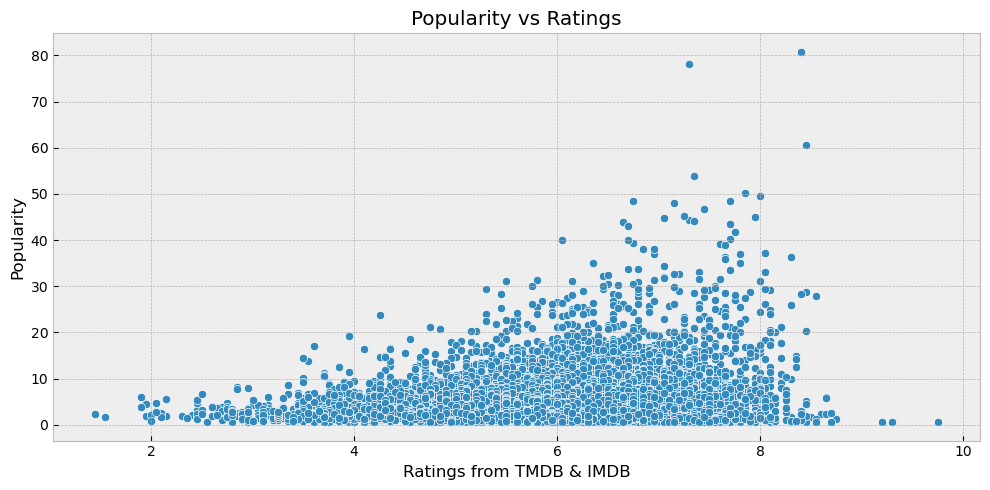

<Figure size 640x480 with 0 Axes>

In [96]:
# Plot the Popularity of the movies vs Ratings
plt.style.use('bmh')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=movies_df, x="vote_average", y="popularity")
plt.xlabel('Ratings from TMDB & IMDB')
plt.ylabel('Popularity')
plt.title('Popularity vs Ratings')
plt.tight_layout()
plt.show()

plt.savefig("images/popularity_vs_ratings.png", bbox_inches='tight')

The figure displays the relationship between popularity and average ratings in the dataset, revealing a positive correlation. As movie popularity and the number of ratings increase, the average user ratings also tend to rise, indicating a common trend where users rate movies they enjoy. 

Interestingly, the data also shows that some movies with high average ratings have received relatively fewer ratings, highlighting instances where high quality may not necessarily coincide with high popularity.

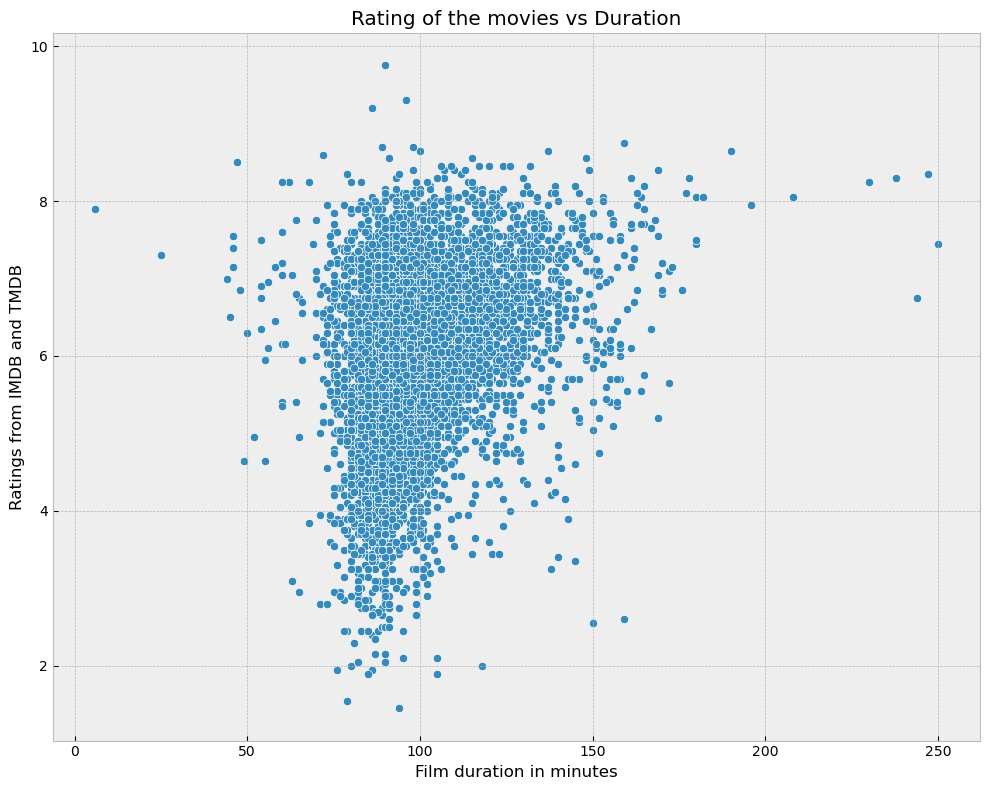

<Figure size 640x480 with 0 Axes>

In [97]:
# Plot the Revenue vs. Movie Name
plt.figure(figsize=(10, 8))
sns.scatterplot(data=movies_df, x="runtime_minutes", y="vote_average")
plt.xlabel('Film duration in minutes')
plt.ylabel('Ratings from IMDB and TMDB')
plt.title('Rating of the movies vs Duration')
plt.tight_layout()
plt.show()

plt.savefig("images/ratings_vs_duration.png", bbox_inches='tight')

Movie durations appear to have a limited influence on ratings, as shown by the scatter plot. Movies of different lengths have garnered both high and low ratings, implying that duration alone isn't a significant predictor of a movie's popularity based on user ratings. 

The plot also highlights that a majority of movies fall within the 80-120 minute range, which seems to resonate well with viewers.

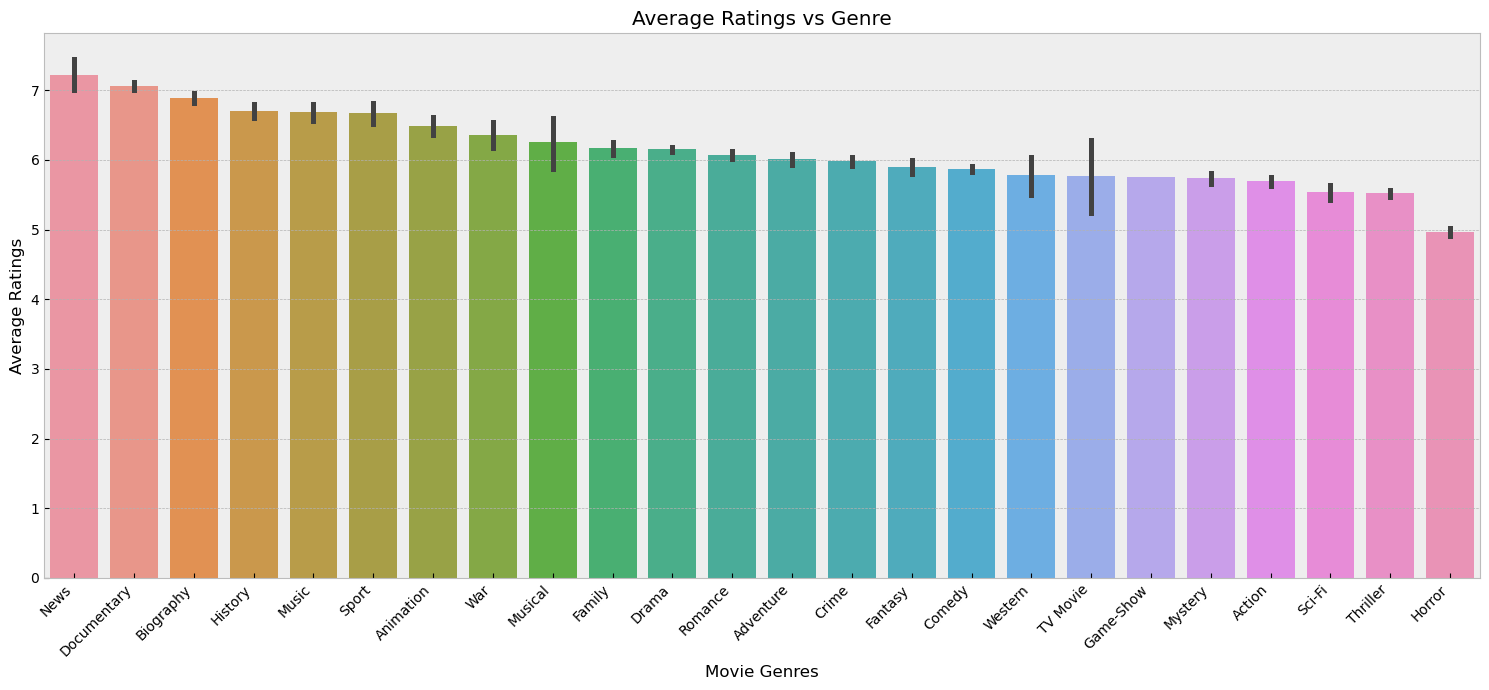

<Figure size 640x480 with 0 Axes>

In [98]:
# bar graph showing the average rating by genre
fig, ax =plt.subplots(figsize=(15,7))
order_by = movies_separate.groupby('genres')['vote_average'].mean().sort_values(ascending=False).index
sns.barplot(data=movies_separate, x='genres', y= 'vote_average', order=order_by, ax=ax)
ax.set_title('Average Ratings vs Genre')
ax.set_ylabel('Average Ratings')
ax.set_xlabel('Movie Genres')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

plt.savefig("images/genre_ratings.png", bbox_inches='tight')

The bar chart of average ratings reveals that genres such as news, documentary, biography, and history receive the highest average ratings, while action, thriller, and horror genres receive the lowest. 

This suggests that viewers tend to vote more for movies they consider average, possibly indicating their inclination to voice dissatisfaction with below-average scores for films that disappoint their expectations. 

This underscores the importance of meeting genre-specific expectations for movie success.

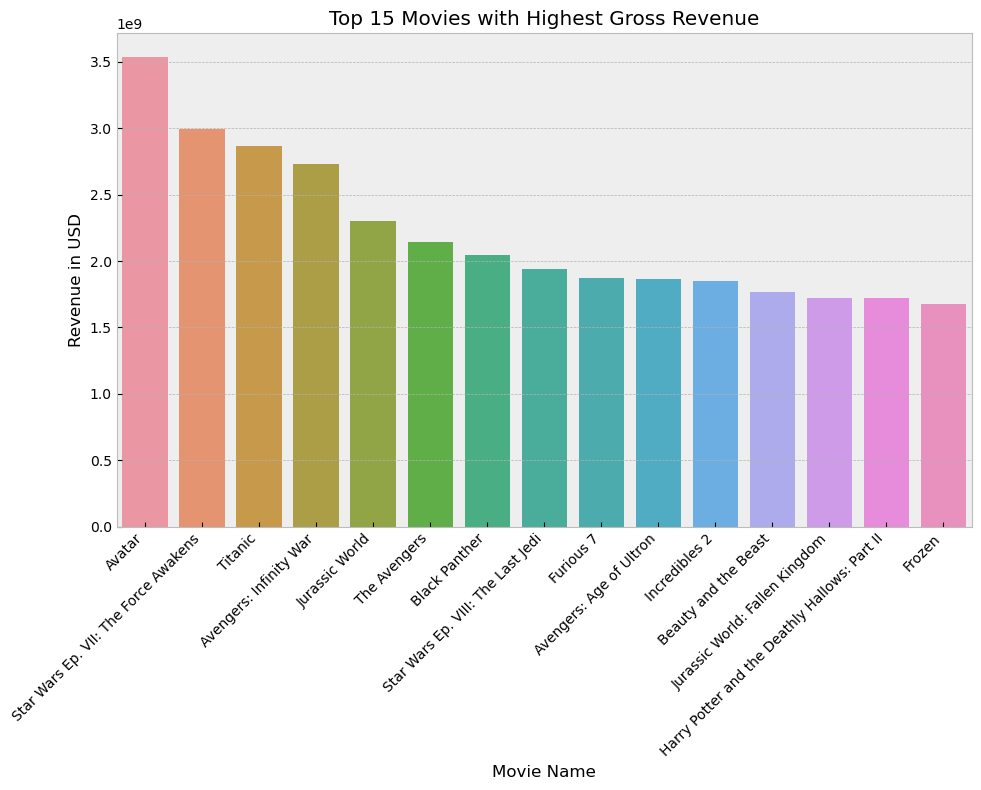

<Figure size 640x480 with 0 Axes>

In [99]:
# Sort the DataFrame by Revenue in descending order
sorted_movie = accounting_df.sort_values(by ='total_gross', ascending = False)
sorted_movie.head()

# Select the top 10 movies with the highest Revenue
top_10_movies_by_gross = sorted_movie.head(15)

# Plot the Revenue vs. Movie Name
plt.figure(figsize=(10, 8))
sns.barplot(x = 'title', y = 'total_gross', data = top_10_movies_by_gross)
# plt.style.use('ggplot')
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Movie Name')
plt.ylabel('Revenue in USD')
plt.title('Top 15 Movies with Highest Gross Revenue')
plt.tight_layout()
plt.show()

plt.savefig("images/top_15_by_gross.png", bbox_inches='tight')

The top 15 movies with the highest total gross revenue encompass a variety of genres, including action, adventure, fantasy, and animation. This diversity implies that a movie's financial success is influenced by factors beyond its genre, such as marketing strategies, casting choices, and engaging storylines. 

Notable movie samples in this list, such as "Avatar," "Star Wars," "Titanic," "Avengers," "Jurassic Park," "Incredibles," and "Frozen," reflect a mix of genres and popularity. These movies might appeal to a wide range of audiences, including families seeking entertainment, thereby contributing to their high revenue. 

This suggests that a successful movie's ability to capture diverse viewer interests is a key factor in achieving substantial total gross revenue.

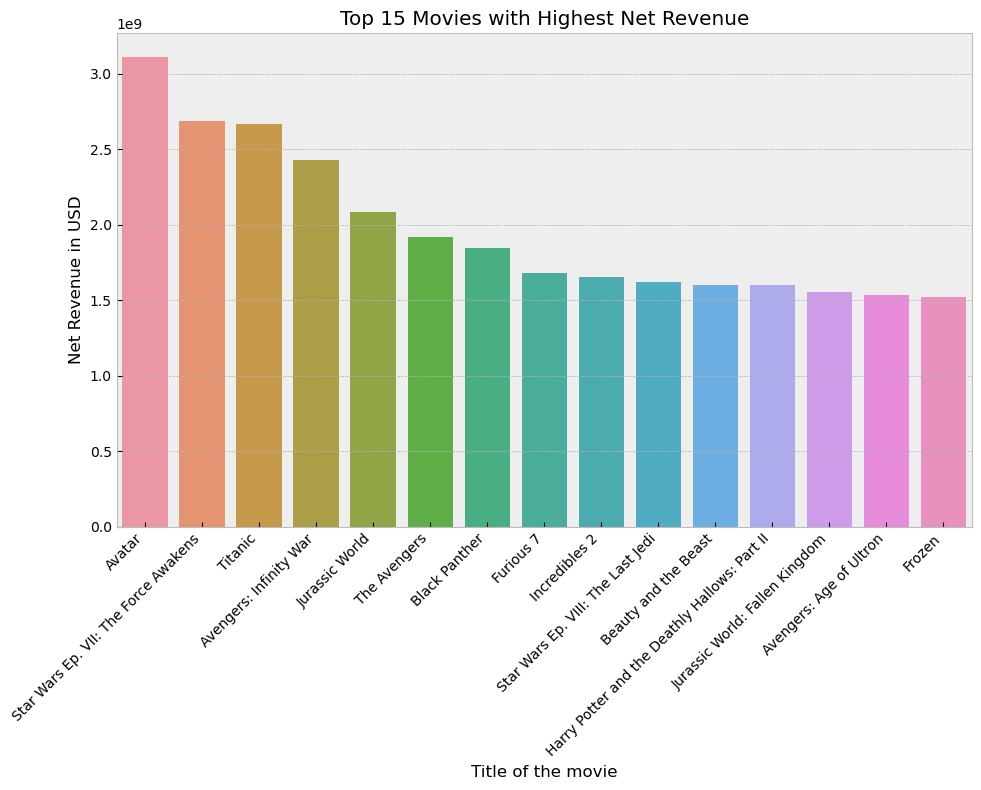

<Figure size 640x480 with 0 Axes>

In [100]:
# Sort the DataFrame by ROI in descending order
movies_by_net_revenue = accounting_df.sort_values(by=['net_revenue'], ascending=False)

# Select the top 10 movies with the highest Revenue
top_10_movies_by_net_revenue = movies_by_net_revenue.head(15)

# Plot the Revenue vs. Movie Name
plt.figure(figsize=(10, 8))
sns.barplot(x = 'title', y = 'net_revenue', data = top_10_movies_by_net_revenue)
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Title of the movie')
plt.ylabel('Net Revenue in USD')
plt.title('Top 15 Movies with Highest Net Revenue')
plt.tight_layout()
plt.show()

plt.savefig("images/top_15_by_net.png", bbox_inches='tight')

The top 15 movies that earn the most money also show up frequently in the list of top 15 movies with the highest profits. This means that movies that do well at the box office also tend to make a lot of profit. 

We want to find out if spending more money on making a movie results in more earnings. This will help us understand if investing more in making movies leads to making more money from them.

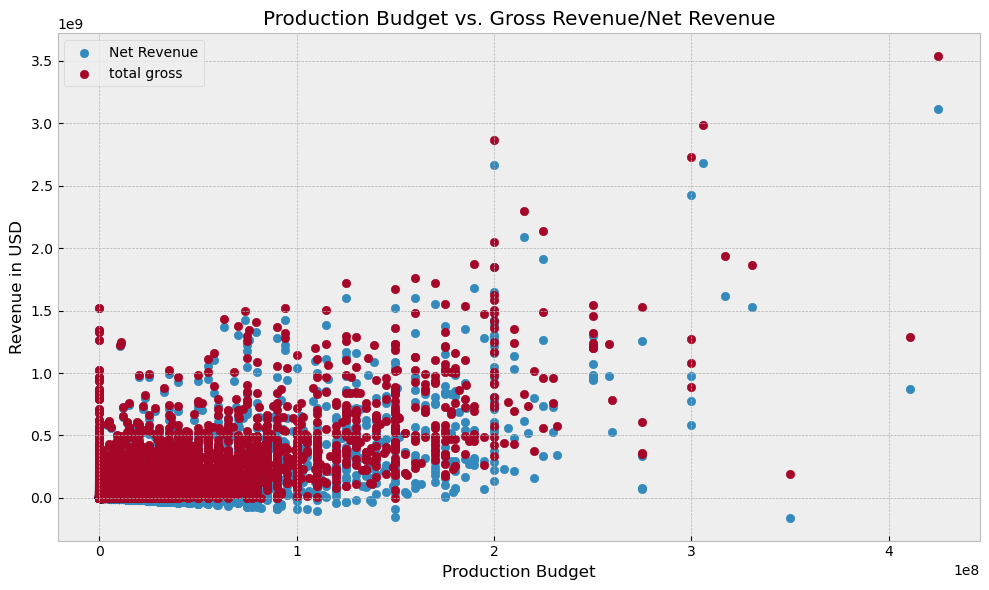

<Figure size 640x480 with 0 Axes>

In [101]:
# creating the subplot
plt.figure(figsize=(10, 6))
# Plotting the scatter plot
plt.scatter(accounting_df['production_budget'], accounting_df['net_revenue'], label = 'Net Revenue')
plt.scatter(accounting_df['production_budget'], accounting_df['total_gross'], label = 'total gross')
plt.xlabel('Production Budget')
plt.ylabel('Revenue in USD')
plt.title('Production Budget vs. Gross Revenue/Net Revenue')
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig("images/production_budget_vs_gross_net.png", bbox_inches='tight')

The analysis of production budgets in relation to gross and net revenue provides interesting insights. It appears that there is a positive correlation between higher production budgets and both higher gross and net revenue. This suggests that investing more in the production of a movie could potentially lead to higher earnings at the box office and greater overall profitability. 

However, it's important to note that while there is a general trend of higher budgets being associated with higher revenues, there are also instances where movies with lower budgets have managed to achieve significant financial success. This indicates that factors beyond just budget, such as story, marketing, and audience reception, also play a crucial role in determining a movie's financial performance.

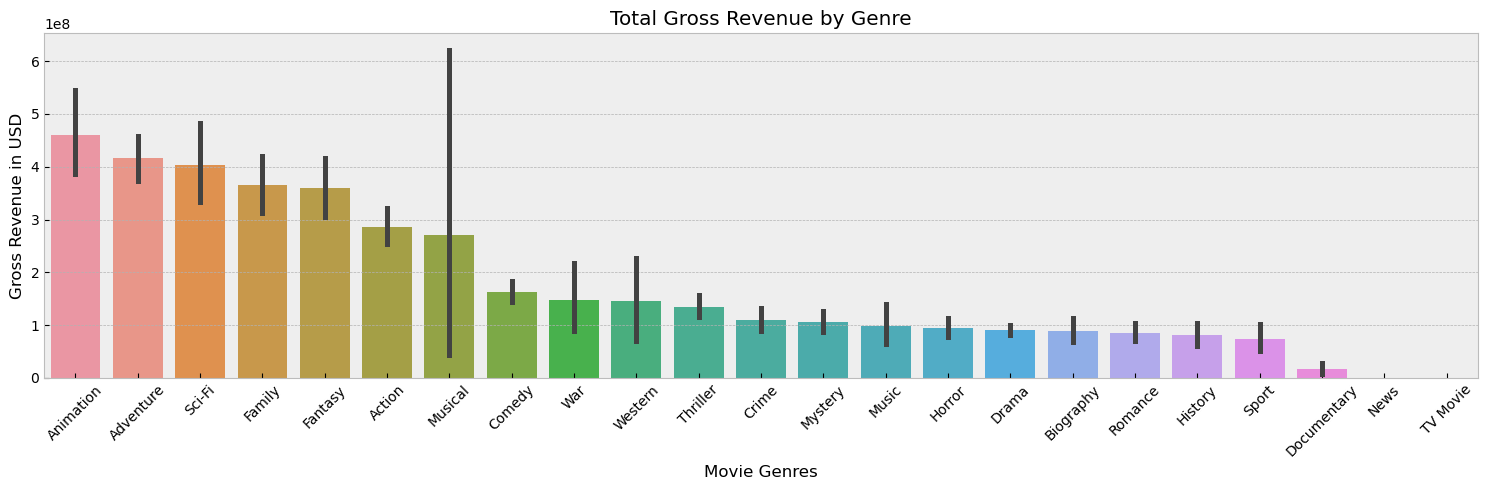

<Figure size 640x480 with 0 Axes>

In [102]:
#bar graph showing the total gross income by genre
fig, ax =plt.subplots(figsize=(15,5))
order_by = df_single_genre.groupby('genres')['total_gross'].mean().sort_values(ascending=False).index
sns.barplot(data=df_single_genre, x='genres', y= 'total_gross', order=order_by, ax=ax)
ax.set_title('Total Gross Revenue by Genre')
plt.xticks(rotation=45);
plt.xlabel('Movie Genres')
plt.ylabel('Gross Revenue in USD')
plt.tight_layout()
plt.show()

plt.savefig("images/gross_revenue_genre.png", bbox_inches='tight')

Examining the movie genres that generate the highest total gross revenue offers intriguing insights into audience preferences and financial success. While the top genres—Animation, Adventure, and Sci-Fi—may not necessarily receive the highest ratings, they consistently secure top positions in terms of earnings. 

Interestingly, Documentary and News genres, which receive higher ratings, often have minimal earnings. This indicates that financial success isn't solely dependent on critical acclaim, and genres that resonate well with audiences tend to result in higher profits. 

Microsoft's new movie studio could leverage this information to strategize their film production approach. They might consider creating movies in genres that have proven to be financially lucrative, while also exploring opportunities to blend higher-rated genres with those that yield substantial revenue. 

This could provide a balanced approach to attract both audiences and earnings.

---
# Conclusion

In this analysis, we embarked on a comprehensive exploration of various dimensions within the movie industry to aid Microsoft's new movie production studio. Our investigation encompassed factors such as genres, ratings, popularity, and financial aspects. 

Notably, we observed consistent correlations between movie popularity, ratings, and commercial success, emphasizing the importance of understanding audience preferences and aligning with market trends. Additionally, we identified that top-grossing movies often lead in net revenue, reinforcing the notion that financial achievements at the box office translate into profits.

# Suggestions:

Based on our findings, we recommend the following strategies to Microsoft:

 - **Genre Diversity:** The top-performing movies encompass various genres, indicating that a diverse content portfolio can attract a wider audience.

 - **Optimized Investment:** While higher production budgets can contribute to revenue, it's essential to strike a balance. Careful evaluation of each project's potential is crucial for maximizing returns.

 - **Quality Focus:** The strong correlation between popularity, ratings, and revenue underscores the importance of delivering high-quality content that resonates with viewers.

 - **Continuous Adaptation:** Ongoing analysis and monitoring of market trends and audience preferences will be instrumental in maintaining competitiveness in the ever-evolving movie industry.

By implementing these strategies, Microsoft can establish itself as a formidable player in the movie production landscape, appealing to audiences and achieving both creative and financial success.